<a href="https://colab.research.google.com/github/Darshan0805/ML_LAB/blob/main/2348548_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("/content/computers - computers.csv")
df

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74
5,5,87
6,6,96
7,6,97
8,7,109
9,8,119


EDA

In [7]:
#Mean
mean_val=df['Minutes'].mean()
mean_val

97.21428571428571

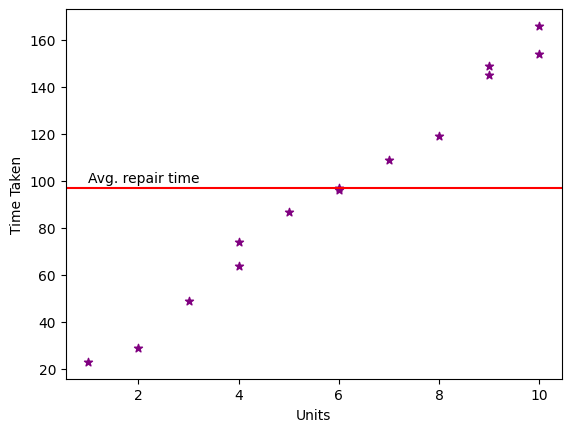

In [8]:
plt.scatter(df['Units'],df['Minutes'],color='purple',marker='*')
plt.axhline(y=mean_val,color='red')
#annotate x and y labels
plt.annotate("Avg. repair time", xy=(1,mean_val+2.5))
plt.xlabel("Units")
plt.ylabel("Time Taken")
plt.plot()
plt.show()

In [9]:
min_model1=df['Minutes'].mean()
min_model2=10+12*df['Units']
min_model3=6+18*df['Units']
#y=c+mx
print(min_model1)
print(min_model2)
print(min_model3)

97.21428571428571
0      22
1      34
2      46
3      58
4      58
5      70
6      82
7      82
8      94
9     106
10    118
11    118
12    130
13    130
Name: Units, dtype: int64
0      24
1      42
2      60
3      78
4      78
5      96
6     114
7     114
8     132
9     150
10    168
11    168
12    186
13    186
Name: Units, dtype: int64


In [10]:
df['Min_model1']=min_model1
df['Min_model2']=min_model2
df['Min_model3']=min_model3
df

,Units,Minutes,Min_model1,Min_model2,Min_model3
0,1,23,97.214286,22,24
1,2,29,97.214286,34,42
2,3,49,97.214286,46,60
3,4,64,97.214286,58,78
4,4,74,97.214286,58,78
5,5,87,97.214286,70,96
6,6,96,97.214286,82,114
7,6,97,97.214286,82,114
8,7,109,97.214286,94,132
9,8,119,97.214286,106,150


Simple Linear Regression

Text(0.5, 1.0, 'Model Comparison')

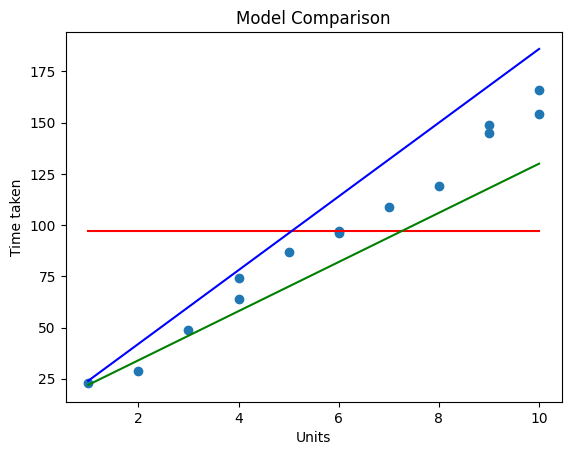

In [11]:
fig, ax=plt.subplots()
ax.scatter(x='Units',y='Minutes',data=df, label='Actual Time Taken')

ax.plot(df['Units'],df['Min_model1'],color='red', label='Model_1')
ax.plot(df['Units'],df['Min_model2'],color='green', label='Model_2')
ax.plot(df['Units'],df['Min_model3'],color='blue', label='Model_3')

ax.set_xlabel('Units')
ax.set_ylabel('Time taken')
ax.set_title('Model Comparison')

In [12]:
model1_obs=pd.DataFrame({'Units':df['Units'],
                         'Actual_Time':df['Minutes'],
                         'Predicted Time':df['Min_model1'],
                         'Error':(df.Min_model1-df.Minutes)})
model1_obs

,Units,Actual_Time,Predicted Time,Error
0,1,23,97.214286,74.214286
1,2,29,97.214286,68.214286
2,3,49,97.214286,48.214286
3,4,64,97.214286,33.214286
4,4,74,97.214286,23.214286
5,5,87,97.214286,10.214286
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,97.214286,-11.785714
9,8,119,97.214286,-21.785714


In [13]:
model2_obs=pd.DataFrame({'Units':df['Units'],
                         'Actual_Time':df['Minutes'],
                         'Predicted Time':df['Min_model2'],
                         'Error':(df.Min_model2-df.Minutes)})
model2_obs

,Units,Actual_Time,Predicted Time,Error
0,1,23,22,-1
1,2,29,34,5
2,3,49,46,-3
3,4,64,58,-6
4,4,74,58,-16
5,5,87,70,-17
6,6,96,82,-14
7,6,97,82,-15
8,7,109,94,-15
9,8,119,106,-13


In [14]:
model3_obs=pd.DataFrame({'Units':df['Units'],
                         'Actual_Time':df['Minutes'],
                         'Predicted Time':df['Min_model3'],
                         'Error':(df.Min_model3-df.Minutes)})
model3_obs

,Units,Actual_Time,Predicted Time,Error
0,1,23,24,1
1,2,29,42,13
2,3,49,60,11
3,4,64,78,14
4,4,74,78,4
5,5,87,96,9
6,6,96,114,18
7,6,97,114,17
8,7,109,132,23
9,8,119,150,31


Analyzing Errors

In [15]:
sum(model1_obs['Error']**2)

27768.357142857145

In [16]:
sum(model2_obs['Error']**2)

4993

In [17]:
sum(model3_obs['Error']**2)

5001

Finding best fit value for m and c

In [18]:
x=df.Units
y=df.Minutes

xy=x*y
n=len(df)

xmean=df.Units.mean()
ymean=df.Minutes.mean()

numerator=xy.sum() - n*xmean*ymean
denom=(x**2).sum() - n*(xmean**2)

m=numerator/denom
c=ymean - (m*xmean)
print('intercept-c:', c, 'Coefficient-m:',m)

intercept-c: 4.161654135338296 Coefficient-m: 15.508771929824569


In [19]:
min_best_fit_model=c+m*df['Units']
df['min_best_fit_model']=min_best_fit_model
df[['Units','Minutes','min_best_fit_model']]

,Units,Minutes,min_best_fit_model
0,1,23,19.670426
1,2,29,35.179198
2,3,49,50.687970
3,4,64,66.196742
4,4,74,66.196742
5,5,87,81.705514
6,6,96,97.214286
7,6,97,97.214286
8,7,109,112.723058
9,8,119,128.231830


plotting of best fit model

Text(0.5, 1.0, 'Best Fit Model Line')

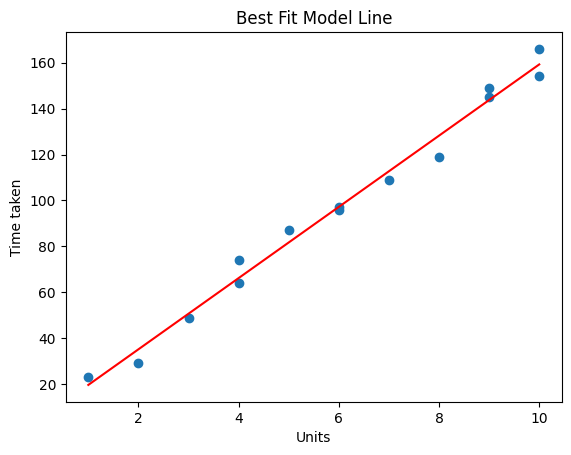

In [20]:
fig, ax=plt.subplots()
ax.scatter(x='Units',y='Minutes',data=df, label='Actual Time Taken')

ax.plot(df['Units'],df['min_best_fit_model'],color='red', label='Best Fit Model')
ax.set_xlabel('Units')
ax.set_ylabel('Time taken')
ax.set_title('Best Fit Model Line')

In [21]:
model_best_obs=pd.DataFrame({'Units':df['Units'],
                         'Actual_Time':df['Minutes'],
                         'Predicted Time':df['min_best_fit_model'],
                         'Error':(df.Minutes-df.min_best_fit_model)})
model_best_obs

,Units,Actual_Time,Predicted Time,Error
0,1,23,19.670426,3.329574
1,2,29,35.179198,-6.179198
2,3,49,50.687970,-1.687970
3,4,64,66.196742,-2.196742
4,4,74,66.196742,7.803258
5,5,87,81.705514,5.294486
6,6,96,97.214286,-1.214286
7,6,97,97.214286,-0.214286
8,7,109,112.723058,-3.723058
9,8,119,128.231830,-9.231830


In [22]:
sum(model_best_obs['Error']**2)

348.848370927318

In [23]:
X=df[['Units']]

In [24]:
y=df['Minutes']

Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model=LinearRegression()

In [27]:
model.fit(X,y)

LinearRegression()

In [28]:
print('Intercept:',model.intercept_)
print('Coefficients:',model.coef_)

Intercept: 4.161654135338296
Coefficients: [15.50877193]


In [32]:
SST = sum((df.Minutes - df.Minutes.mean())**2)
SST

27768.357142857145

In [38]:
SSE = sum(model_best_obs.Error**2)
SSE

348.848370927318

In [39]:
SSR = SST - SSE
SSR

27419.508771929828

In [40]:
Rsq=SSR/SST
Rsq

0.9874371980620736

In [41]:
Rsq1=model.score(df[['Units']],y)
Rsq1

0.9874371980620736